# A análise de sentimentos  em avaliação de filmes

### Importando bibliotecas

In [1]:
import pandas as pd  # Biblioteca para manipulação de dados
import matplotlib.pyplot as plt  # Biblioteca para criação de gráficos
import seaborn as sns  # Biblioteca para visualização de dados
import plotly.express as px  # Biblioteca para criação de gráficos interativos
from matplotlib import style  # Configuração de estilos para gráficos
style.use('ggplot')  # Definindo o estilo 'ggplot' para os gráficos
import re  # Biblioteca para expressões regulares
from nltk.tokenize import word_tokenize  # Função para tokenização de palavras
from nltk.stem import PorterStemmer  # Função para stemização de palavras
from nltk.corpus import stopwords  # Conjunto de palavras irrelevantes (stopwords)
stop_words = set(stopwords.words('english'))  # Definindo as stopwords em inglês
from wordcloud import WordCloud  # Biblioteca para criação de nuvens de palavras
from sklearn.feature_extraction.text import TfidfVectorizer  # Função para vetorizar textos
from sklearn.model_selection import train_test_split  # Função para dividir o dataset

### Importando o dataset e extraindo informações

In [2]:
df = pd.read_csv('dataset.csv')  # Carregando o dataset
df.head()  # Exibindo as primeiras linhas do dataset

review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive

In [3]:
df.shape  # Mostrando a forma (linhas, colunas) do dataset

(50000, 2)

In [4]:
df.info()  # Exibindo informações sobre as colunas e tipos de dados do dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


Text(0.5, 1.0, 'Distribution')

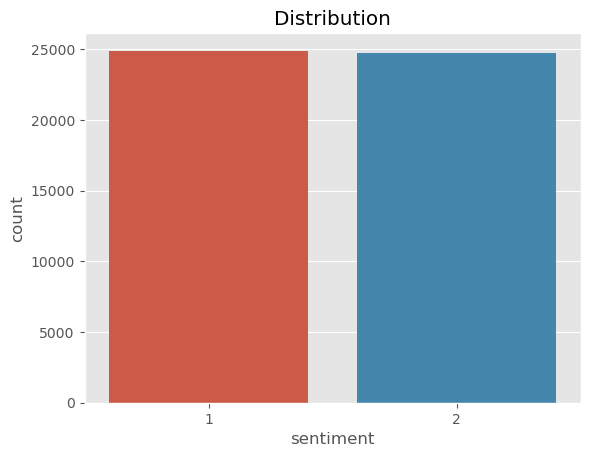

In [48]:
sns.countplot(x='sentiment', data=df)  # Criando um gráfico de contagem
plt.title("Distribution")  # Adicionando um título ao gráfico

In [6]:
for i in range(5):  # Iterando pelas 5 primeiras avaliações
    print("Review: ", [i])
    print(df['review'].iloc[i], "\n")
    print("Sentiment: ", df['sentiment'].iloc[i], "\n\n")

Review:  [0]
One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is d

In [7]:
def no_of_words(text):
    words= text.split()  # Separando o texto em palavras
    word_count = len(words)  # Contando o número de palavras
    return word_count

In [8]:
df['word count'] = df['review'].apply(no_of_words)  # Aplicando a função de contagem de palavras às avaliações

In [9]:
df.head()  # Exibindo as primeiras linhas do dataframe atualizado

review sentiment  word count
0  One of the other reviewers has mentioned that ...  positive         307
1  A wonderful little production. <br /><br />The...  positive         162
2  I thought this was a wonderful way to spend ti...  positive         166
3  Basically there's a family where a little boy ...  negative         138
4  Petter Mattei's "Love in the Time of Money" is...  positive         230

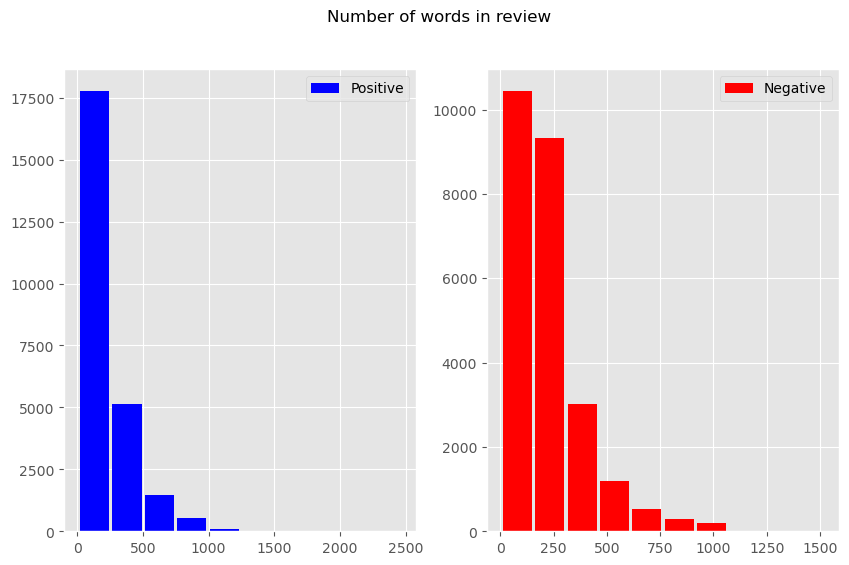

In [10]:
fig, ax = plt.subplots(1,2, figsize=(10,6))
ax[0].hist(df[df['sentiment'] == 'positive']['word count'], label='Positive', color='blue', rwidth=0.9);
ax[0].legend(loc='upper right');
ax[1].hist(df[df['sentiment'] == 'negative']['word count'], label='Negative', color='red', rwidth=0.9);
ax[1].legend(loc='upper right');
fig.suptitle("Number of words in review")
plt.show()

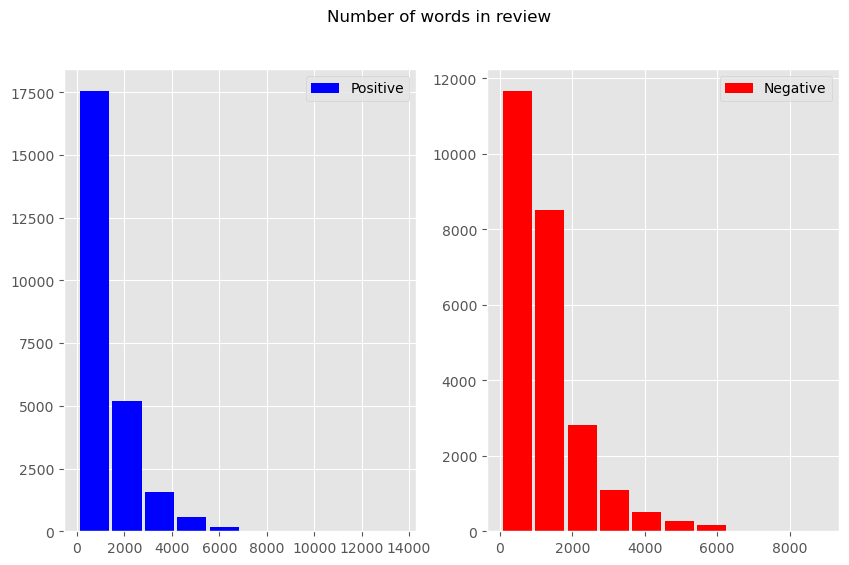

In [11]:
fig, ax = plt.subplots(1,2, figsize=(10,6))
ax[0].hist(df[df['sentiment'] == 'positive']['review'].str.len(), label='Positive', color='blue', rwidth=0.9);
ax[0].legend(loc='upper right');
ax[1].hist(df[df['sentiment'] == 'negative']['review'].str.len(), label='Negative', color='red', rwidth=0.9);
ax[1].legend(loc='upper right');
fig.suptitle("Number of words in review")
plt.show()

In [12]:
df.sentiment.replace("positive", 1, inplace=True)  # Substituindo 'positive' por 1
df.sentiment.replace("negative", 2, inplace=True)  # Substituindo 'negative' por 2

In [13]:
df.head()  # Exibindo as primeiras linhas do dataframe atualizado

review  sentiment  word count
0  One of the other reviewers has mentioned that ...          1         307
1  A wonderful little production. <br /><br />The...          1         162
2  I thought this was a wonderful way to spend ti...          1         166
3  Basically there's a family where a little boy ...          2         138
4  Petter Mattei's "Love in the Time of Money" is...          1         230

### Pré-processamento

In [14]:
def data_processing(text):
    text= text.lower()  # Convertendo o texto para minúsculas
    text = re.sub('<br />', '', text)  # Removendo tags HTML
    text = re.sub(r"https\S+|www\S+|http\S+", '', text, flags = re.MULTILINE)  # Removendo URLs
    text = re.sub(r'\@w+|\#', '', text)  # Removendo mencões e hashtags
    text = re.sub(r'[^\w\s]', '', text)  # Removendo pontuação
    text_tokens = word_tokenize(text)  # Tokenizando o texto
    filtered_text = [w for w in text_tokens if not w in stop_words]  # Removendo stopwords
    return " ".join(filtered_text)  # Juntando as palavras filtradas em um texto

In [15]:
df.review = df['review'].apply(data_processing)  # Aplicando a função de processamento às avaliações

In [16]:
duplicated_count = df.duplicated().sum()  # Contando o número de entradas duplicadas
print("Number of duplicate entries: ", duplicated_count)

Number of duplicate entries:  421


In [17]:
df = df.drop_duplicates('review')  # Removendo duplicatas baseadas na coluna 'review'

### Stemming

In [18]:
stemmer = PorterStemmer()
def stemming(data):
    text = [stemmer.stem(word) for word in data]
    return data

In [19]:
df.review = df['review'].apply(lambda x: stemming(x))  # Aplicando a função de stemização às avaliações

In [20]:
df['word count'] = df['review'].apply(no_of_words)  # Atualizando a contagem de palavras
df.head()  # Exibindo as primeiras linhas do dataframe atualizado

review  sentiment  word count
0  one reviewers mentioned watching 1 oz episode ...          1         168
1  wonderful little production filming technique ...          1          84
2  thought wonderful way spend time hot summer we...          1          86
3  basically theres family little boy jake thinks...          2          67
4  petter matteis love time money visually stunni...          1         125

### Avaliações e palavras frequentes

In [21]:
pos_reviews = df[df.sentiment == 1]  # Filtrando avaliações positivas
pos_reviews.head()  # Exibindo as primeiras avaliações positivas

review  sentiment  word count
0  one reviewers mentioned watching 1 oz episode ...          1         168
1  wonderful little production filming technique ...          1          84
2  thought wonderful way spend time hot summer we...          1          86
4  petter matteis love time money visually stunni...          1         125
5  probably alltime favorite movie story selfless...          1          58

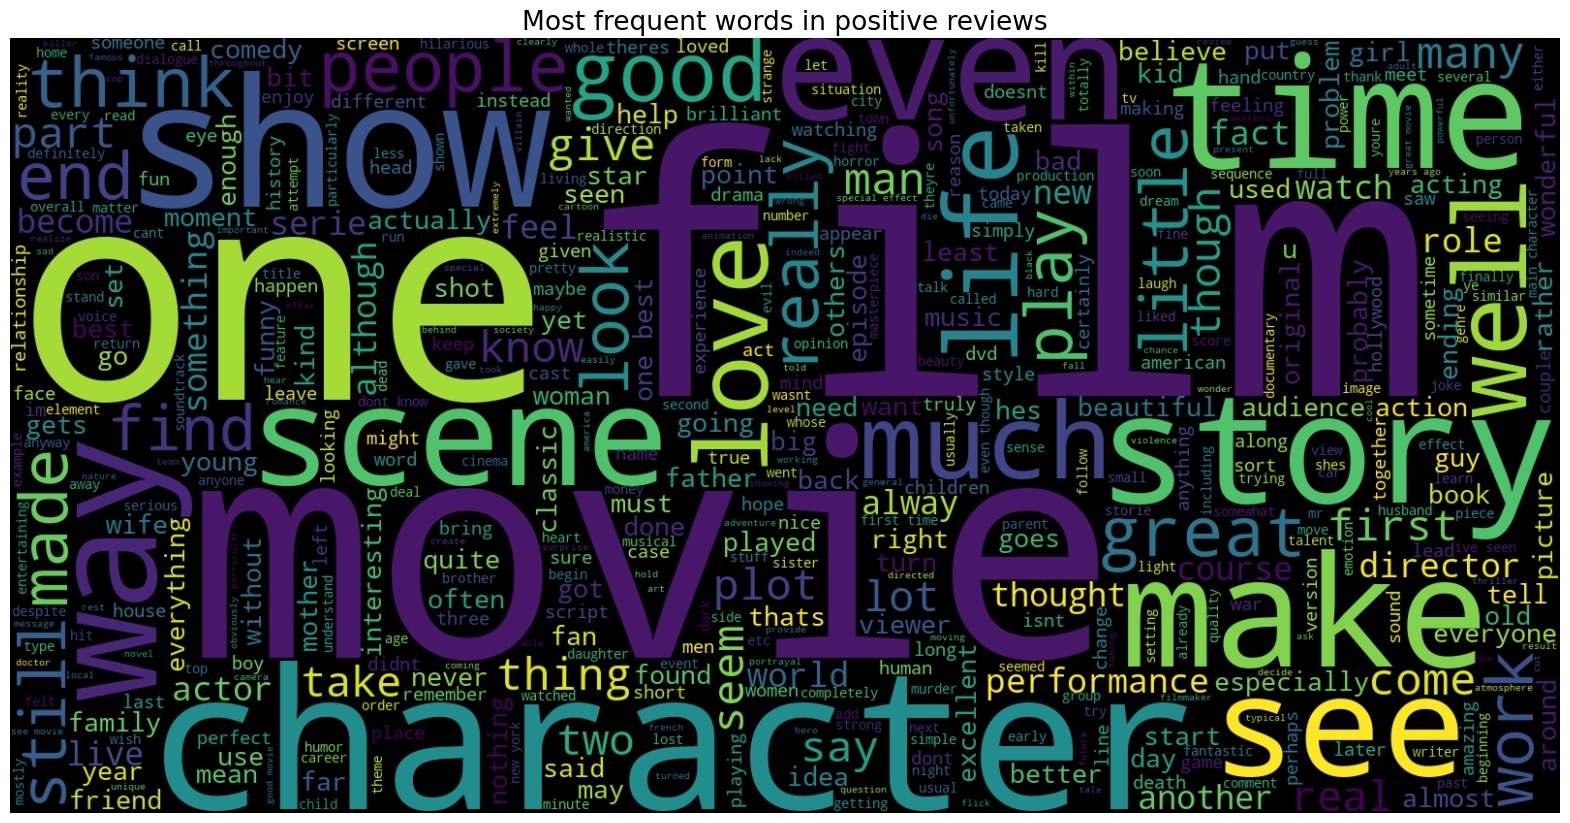

In [22]:
text = ' '.join([word for word in pos_reviews['review']])  # Juntando todas as palavras das avaliações positivas
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)  # Gerando a nuvem de palavras
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent words in positive reviews', fontsize = 19)
plt.show()

In [23]:
from collections import Counter
count = Counter()
for text in pos_reviews['review'].values:
    for word in text.split():
        count[word] +=1
count.most_common(15)  # Mostrando as 15 palavras mais comuns

[('film', 39285),
 ('movie', 35830),
 ('one', 25621),
 ('like', 16998),
 ('good', 14281),
 ('great', 12568),
 ('story', 12338),
 ('see', 11814),
 ('time', 11724),
 ('well', 10930),
 ('really', 10638),
 ('also', 10516),
 ('would', 10320),
 ('even', 9318),
 ('much', 8971)]

In [24]:
pos_words = pd.DataFrame(count.most_common(15))  # Criando um dataframe com as palavras mais comuns
pos_words.columns = ['word', 'count']  # Nomeando as colunas
pos_words.head()  # Exibindo as primeiras linhas do dataframe

word  count
0   film  39285
1  movie  35830
2    one  25621
3   like  16998
4   good  14281

In [25]:
px.bar(pos_words, x='count', y='word', title='Common words in positive reviews', color = 'word')  # Criando gráfico de barras

In [26]:
neg_reviews = df[df.sentiment == 2]  # Filtrando avaliações negativas
neg_reviews.head()  # Exibindo as primeiras avaliações negativas

review  sentiment  word count
3   basically theres family little boy jake thinks...          2          67
7   show amazing fresh innovative idea 70s first a...          2          83
8   encouraged positive comments film looking forw...          2          64
10  phil alien one quirky films humour based aroun...          2          51
11  saw movie 12 came recall scariest scene big bi...          2          84

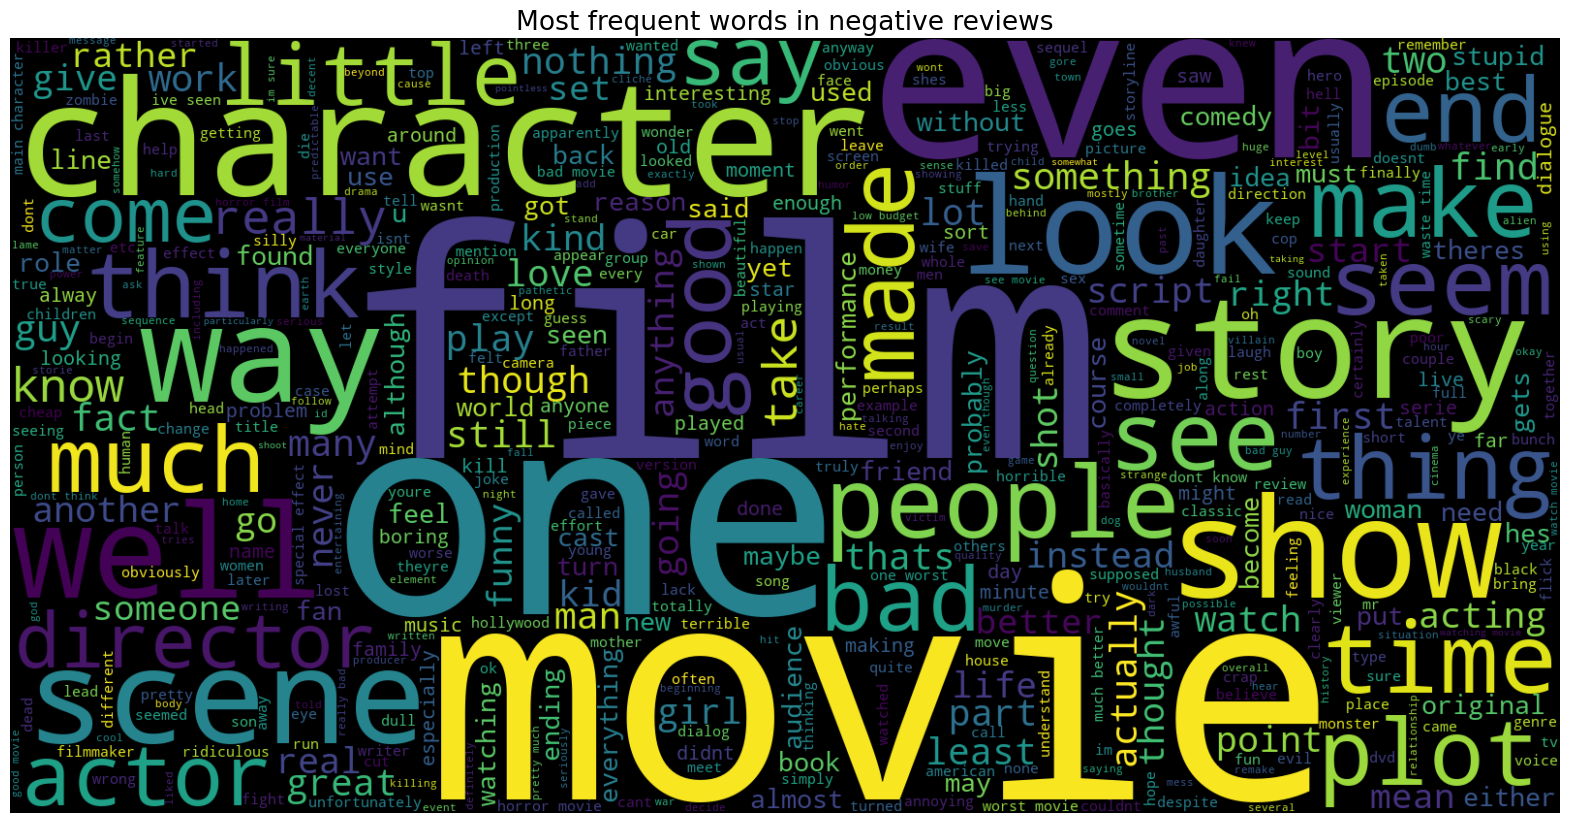

In [27]:
text = ' '.join([word for word in neg_reviews['review']])  # Juntando todas as palavras das avaliações negativas
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)  # Gerando a nuvem de palavras
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent words in negative reviews', fontsize = 19)
plt.show()

In [28]:
count = Counter()
for text in neg_reviews['review'].values:  # Iterando pelas avaliações negativas
    for word in text.split():  # Contando a frequência de cada palavra
        count[word] += 1
count.most_common(15)  # Mostrando as 15 palavras mais comuns

[('movie', 47001),
 ('film', 34651),
 ('one', 24361),
 ('like', 21508),
 ('even', 14759),
 ('good', 13995),
 ('bad', 13903),
 ('would', 13482),
 ('really', 12084),
 ('time', 11349),
 ('see', 10412),
 ('dont', 9912),
 ('get', 9884),
 ('much', 9758),
 ('story', 9563)]

In [29]:
neg_words = pd.DataFrame(count.most_common(15))  # Criando um dataframe com as palavras mais comuns
neg_words.columns = ['word', 'count']  # Nomeando as colunas
neg_words.head()  # Exibindo as primeiras linhas do dataframe

word  count
0  movie  47001
1   film  34651
2    one  24361
3   like  21508
4   even  14759

In [30]:
px.bar(neg_words, x='count', y='word', title='Common words in negative reviews', color = 'word')  # Criando gráfico de barras

### Fatoração dos dados

In [31]:
X = df['review']  # Definindo a variável independente (reviews)
Y = df['sentiment']  # Definindo a variável dependente (sentimentos)

In [32]:
vect = TfidfVectorizer()  # Inicializando o vetor TF-IDF
X = vect.fit_transform(df['review'])  # Aplicando a vetorização às avaliações

In [33]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)  # Dividindo o dataset

In [34]:
print("Size of x_train: ", (x_train.shape))  # Tamanho do conjunto de treinamento (x)
print("Size of y_train: ", (y_train.shape))  # Tamanho do conjunto de treinamento (y)
print("Size of x_test: ", (x_test.shape))  # Tamanho do conjunto de teste (x)
print("Size of y_test: ", (y_test.shape))  # Tamanho do conjunto de teste (y)

Size of x_train:  (34704, 221707)
Size of y_train:  (34704,)
Size of x_test:  (14874, 221707)
Size of y_test:  (14874,)


### Importando os modelos 

In [35]:
from sklearn.linear_model import LogisticRegression  # Regressão Logística
from sklearn.naive_bayes import MultinomialNB  # Naive Bayes Multinomial
from sklearn.svm import LinearSVC  # SVM Linear
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix  # Métricas de avaliação
import warnings
warnings.filterwarnings('ignore')  # Ignorando avisos

##### Regressão Logística (Logistic Regression)

In [36]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)  # Treinando o modelo
logreg_pred = logreg.predict(x_test)  # Fazendo previsões
logreg_acc = accuracy_score(logreg_pred, y_test)  # Calculando a acurácia
print("Test accuracy: {:.2f}%".format(logreg_acc*100))  # Exibindo a acurácia do teste

Test accuracy: 89.00%


In [37]:
print(confusion_matrix(y_test, logreg_pred))  # Matriz de confusão
print("\n")
print(classification_report(y_test, logreg_pred))  # Relatório de classificação

[[6785  728]
 [ 908 6453]]


              precision    recall  f1-score   support

           1       0.88      0.90      0.89      7513
           2       0.90      0.88      0.89      7361

    accuracy                           0.89     14874
   macro avg       0.89      0.89      0.89     14874
weighted avg       0.89      0.89      0.89     14874



##### Naive Bayes Multinomial (Multinomial Naive Bayes)

In [38]:
mnb = MultinomialNB()
mnb.fit(x_train, y_train)  # Treinando o modelo
mnb_pred = mnb.predict(x_test)  # Fazendo previsões
mnb_acc = accuracy_score(mnb_pred, y_test)  # Calculando a acurácia
print("Test accuracy: {:.2f}%".format(mnb_acc*100))  # Exibindo a acurácia do teste

Test accuracy: 86.44%


In [39]:
print(confusion_matrix(y_test, mnb_pred))  # Matriz de confusão
print("\n")
print(classification_report(y_test, mnb_pred))  # Relatório de classificação

[[6439 1074]
 [ 943 6418]]


              precision    recall  f1-score   support

           1       0.87      0.86      0.86      7513
           2       0.86      0.87      0.86      7361

    accuracy                           0.86     14874
   macro avg       0.86      0.86      0.86     14874
weighted avg       0.86      0.86      0.86     14874



##### Classificador de Vetor de Suporte Linear (Linear Support Vector Classifier)

In [40]:
svc = LinearSVC()
svc.fit(x_train, y_train)  # Treinando o modelo
svc_pred = svc.predict(x_test)  # Fazendo previsões
svc_acc = accuracy_score(svc_pred, y_test)  # Calculando a acurácia
print("Test accuracy: {:.2f}%".format(svc_acc*100))  # Exibindo a acurácia do teste

Test accuracy: 89.22%


In [41]:
print(confusion_matrix(y_test, svc_pred))  # Matriz de confusão
print("\n")
print(classification_report(y_test, svc_pred))  # Relatório de classificação

[[6766  747]
 [ 857 6504]]


              precision    recall  f1-score   support

           1       0.89      0.90      0.89      7513
           2       0.90      0.88      0.89      7361

    accuracy                           0.89     14874
   macro avg       0.89      0.89      0.89     14874
weighted avg       0.89      0.89      0.89     14874



### Classificação

In [42]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C':[0.1, 1, 10, 100], 'loss':['hinge', 'squared_hinge']}  # Definindo a grade de parâmetros
grid = GridSearchCV(svc, param_grid, refit=True, verbose=3)  # Inicializando a busca em grade
grid.fit(x_train, y_train)  # Treinando com busca em grade

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5] END .................C=0.1, loss=hinge;, score=0.872 total time=   0.0s
[CV 2/5] END .................C=0.1, loss=hinge;, score=0.875 total time=   0.0s
[CV 3/5] END .................C=0.1, loss=hinge;, score=0.871 total time=   0.0s
[CV 4/5] END .................C=0.1, loss=hinge;, score=0.878 total time=   0.0s
[CV 5/5] END .................C=0.1, loss=hinge;, score=0.874 total time=   0.0s
[CV 1/5] END .........C=0.1, loss=squared_hinge;, score=0.892 total time=   0.0s
[CV 2/5] END .........C=0.1, loss=squared_hinge;, score=0.895 total time=   0.0s
[CV 3/5] END .........C=0.1, loss=squared_hinge;, score=0.888 total time=   0.0s
[CV 4/5] END .........C=0.1, loss=squared_hinge;, score=0.894 total time=   0.0s
[CV 5/5] END .........C=0.1, loss=squared_hinge;, score=0.890 total time=   0.0s
[CV 1/5] END ...................C=1, loss=hinge;, score=0.896 total time=   0.1s
[CV 2/5] END ...................C=1, loss=hinge;,

GridSearchCV(estimator=LinearSVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'loss': ['hinge', 'squared_hinge']},
             verbose=3)

### Resultados

In [43]:
print("best cross validation score: {:.2f}".format(grid.best_score_))  # Melhor pontuação da validação cruzada
print("best parameters: ", grid.best_params_)  # Melhores parâmetros encontrados

best cross validation score: 0.89
best parameters:  {'C': 1, 'loss': 'hinge'}


In [44]:
svc = LinearSVC(C=1, loss='hinge')  # Inicializando o modelo com os melhores parâmetros
svc.fit(x_train, y_train)  # Treinando o modelo
svc_pred = svc.predict(x_test)  # Fazendo previsões
svc_acc = accuracy_score(svc_pred, y_test)  # Calculando a acurácia
print("Test accuracy: {:.2f}%".format(svc_acc*100))  # Exibindo a acurácia do teste

Test accuracy: 89.41%


In [47]:
print(confusion_matrix(y_test, svc_pred))  # Matriz de confusão
print("\n")
print(classification_report(y_test, svc_pred))  # Relatório de classificação

[[6788  725]
 [ 850 6511]]


              precision    recall  f1-score   support

           1       0.89      0.90      0.90      7513
           2       0.90      0.88      0.89      7361

    accuracy                           0.89     14874
   macro avg       0.89      0.89      0.89     14874
weighted avg       0.89      0.89      0.89     14874

